<a href="https://colab.research.google.com/github/Ahsanbeg/Ahsanbeg/blob/main/CaseStudy__ECom_Bigquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TheLook ECommerce : Case Study**



**Dataset** : [BigQuery Public Data](https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce?amp;invt=Abooaw&amp;project=athenednatest&pli=1&invt=Abq1ag&project=solid-choir-372007)

### **Installing Package**

In [1]:
# !pip install google-cloud-bigquery
# !pip install --upgrade google-cloud-bigquery
# ! pip install pandasql

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


### **Fetching Data from Google BigQuery in Google Colab**

1️⃣ **Using Google BigQuery Client**

2️⃣  **Using BigQuery Magic (%%bigquery)**

### **1️⃣ Using Google BigQuery Client**

- Authenticated with Google Cloud
- Used the `google.cloud.bigquery` library
- Query each table and store it in separate DataFrames


In [3]:
from google.colab import auth
from google.cloud import bigquery

auth.authenticate_user()
print('Authenticated')

# Project ID
PROJECT_ID = "solid-choir-372007"

# Initialize BigQuery client with project ID
client = bigquery.Client(project=PROJECT_ID)

Authenticated


In [4]:
# List of table names
table_names = [
    "distribution_centers",
    "events",
    "inventory_items",
    "order_items",
    "orders",
    "products",
    "users"
]

# Fetch each table and store in separate DataFrame variables
for table in table_names:
    query = f"SELECT * FROM `bigquery-public-data.thelook_ecommerce.{table}`"
    df = client.query(query).to_dataframe()
    globals()[f"{table}_df"] = df


### **2️⃣ Using BigQuery Magic (%%bigquery)**

In [5]:
# %%bigquery distribution_centers_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`

In [6]:
# %%bigquery events_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.events`

In [7]:
# %%bigquery inventory_items_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.inventory_items`

In [8]:
# %%bigquery order_items_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items`

In [9]:
# %%bigquery orders_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.orders`

In [10]:
# %%bigquery products_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.products`

In [11]:
# %%bigquery users_df --project solid-choir-372007
# SELECT * FROM `bigquery-public-data.thelook_ecommerce.users`

# **DataFrames**

In [12]:
distribution_centers_df.head()

,id,name,latitude,longitude,distribution_center_geom
0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,POINT(-73.7834 40.634)
1,2,Chicago IL,41.8369,-87.6847,POINT(-87.6847 41.8369)
2,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
3,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)
4,10,Savannah GA,32.0167,-81.1167,POINT(-81.1167 32.0167)


In [13]:
events_df.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1591392,<NA>,3,980468d9-9ef4-4a81-a902-d38633f0f4a2,2021-07-12 09:24:00+00:00,178.182.216.19,São Paulo,São Paulo,02675-031,Firefox,Adwords,/cancel,cancel
1,2144751,<NA>,3,5ea075b0-eacc-48a7-a8e4-30ef654f7122,2022-12-30 04:00:00+00:00,170.36.196.208,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
2,1961824,<NA>,3,2211177f-d127-40f0-8713-b3acdf1c79f5,2022-12-12 14:08:00+00:00,138.132.206.51,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel
3,2039166,<NA>,3,bc65d9fd-6e6b-4565-ace6-e344edddd3d7,2024-03-08 18:01:00+00:00,161.55.158.123,Santa Isabel,São Paulo,07500-000,Chrome,Adwords,/cancel,cancel
4,1404937,<NA>,3,4395faf8-f8d2-4ff4-9e18-e9ac97fb215a,2025-02-25 15:11:00+00:00,216.159.72.231,Lijiang,Beijing,100012,Chrome,Adwords,/cancel,cancel


In [14]:
inventory_items_df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,174007,13844,2024-02-05 02:42:19+00:00,2024-03-21 09:40:19+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,174008,13844,2021-05-07 16:51:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,285283,13844,2025-01-23 22:57:15+00:00,2025-02-19 12:48:15+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,285284,13844,2021-06-12 11:53:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,317441,13844,2022-06-28 16:42:28+00:00,2022-08-22 01:26:28+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [15]:
order_items_df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,95160,65637,52676,14235,256990,Complete,2024-03-16 17:00:33+00:00,2024-03-16 14:18:00+00:00,2024-03-18 11:30:00+00:00,NaT,0.02
1,152115,104759,83815,14235,410672,Processing,2024-12-13 08:23:19+00:00,NaT,NaT,NaT,0.02
2,149647,103056,82419,14159,404026,Cancelled,2024-05-09 16:30:32+00:00,NaT,NaT,NaT,0.49
3,39361,27072,21689,14159,106296,Complete,2024-09-26 22:11:33+00:00,2024-09-29 02:48:00+00:00,2024-10-02 15:32:00+00:00,NaT,0.49
4,89802,61945,49778,14159,242523,Complete,2025-02-26 07:21:37+00:00,2025-02-27 00:52:00+00:00,2025-02-27 05:13:00+00:00,NaT,0.49


In [16]:
orders_df.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,7,6,Cancelled,F,2024-07-05 14:50:00+00:00,NaT,NaT,NaT,1
1,8,8,Cancelled,F,2024-09-08 02:56:00+00:00,NaT,NaT,NaT,1
2,35,34,Cancelled,F,2022-01-08 11:09:00+00:00,NaT,NaT,NaT,1
3,57,53,Cancelled,F,2021-12-25 18:35:00+00:00,NaT,NaT,NaT,1
4,65,62,Cancelled,F,2024-03-03 13:28:00+00:00,NaT,NaT,NaT,1


In [17]:
products_df.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [18]:
users_df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,80874,Willie,Gomez,williegomez@example.org,52,M,Acre,461 Sarah Ferry,69980-000,null,Brasil,-8.065346,-72.870949,Search,2025-01-16 10:13:00+00:00,POINT(-72.87094866 -8.065346116)
1,26461,Emily,Fox,emilyfox@example.net,32,F,Acre,9310 Gallagher Groves Apt. 575,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-09-16 05:40:00+00:00,POINT(-72.87094866 -8.065346116)
2,49626,David,Nelson,davidnelson@example.net,60,M,Acre,7879 Franklin Wall,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-12-30 00:03:00+00:00,POINT(-72.87094866 -8.065346116)
3,11755,Rita,Smith,ritasmith@example.net,39,F,Acre,0393 Nicole Camp Apt. 654,69980-000,null,Brasil,-8.065346,-72.870949,Search,2022-02-23 11:20:00+00:00,POINT(-72.87094866 -8.065346116)
4,35020,Cindy,Vaughn,cindyvaughn@example.net,66,F,Acre,8519 Brandon Turnpike,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-04-17 05:30:00+00:00,POINT(-72.87094866 -8.065346116)


## **EDA**

### **distribution_centers_df**

In [19]:
distribution_centers_df.head()

,id,name,latitude,longitude,distribution_center_geom
0,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834,POINT(-73.7834 40.634)
1,2,Chicago IL,41.8369,-87.6847,POINT(-87.6847 41.8369)
2,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
3,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)
4,10,Savannah GA,32.0167,-81.1167,POINT(-81.1167 32.0167)


In [20]:
distribution_centers_df.shape

(10, 5)

In [21]:
distribution_centers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10 non-null     Int64  
 1   name                      10 non-null     object 
 2   latitude                  10 non-null     float64
 3   longitude                 10 non-null     float64
 4   distribution_center_geom  10 non-null     object 
dtypes: Int64(1), float64(2), object(2)
memory usage: 542.0+ bytes


In [22]:
distribution_centers_df.describe ()

,id,latitude,longitude
count,10.0,10.000000,10.000000
mean,5.5,34.679310,-87.938550
std,3.02765,4.572666,12.722916
min,1.0,29.760400,-118.250000
25%,3.25,31.024975,-90.042800
50%,5.5,33.416650,-87.863900
75%,7.75,38.741850,-80.229150
max,10.0,41.836900,-73.783400


In [23]:
distribution_centers_df.isnull().sum()

,0
id,0
name,0
latitude,0
longitude,0
distribution_center_geom,0


In [24]:
distribution_centers_df.duplicated().sum()

0

### **events_df**

In [25]:
events_df.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1591392,<NA>,3,980468d9-9ef4-4a81-a902-d38633f0f4a2,2021-07-12 09:24:00+00:00,178.182.216.19,São Paulo,São Paulo,02675-031,Firefox,Adwords,/cancel,cancel
1,2144751,<NA>,3,5ea075b0-eacc-48a7-a8e4-30ef654f7122,2022-12-30 04:00:00+00:00,170.36.196.208,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
2,1961824,<NA>,3,2211177f-d127-40f0-8713-b3acdf1c79f5,2022-12-12 14:08:00+00:00,138.132.206.51,São Paulo,São Paulo,02675-031,Chrome,Email,/cancel,cancel
3,2039166,<NA>,3,bc65d9fd-6e6b-4565-ace6-e344edddd3d7,2024-03-08 18:01:00+00:00,161.55.158.123,Santa Isabel,São Paulo,07500-000,Chrome,Adwords,/cancel,cancel
4,1404937,<NA>,3,4395faf8-f8d2-4ff4-9e18-e9ac97fb215a,2025-02-25 15:11:00+00:00,216.159.72.231,Lijiang,Beijing,100012,Chrome,Adwords,/cancel,cancel


In [26]:
events_df.shape

(2426927, 13)

In [27]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426927 entries, 0 to 2426926
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               Int64              
 1   user_id          Int64              
 2   sequence_number  Int64              
 3   session_id       object             
 4   created_at       datetime64[us, UTC]
 5   ip_address       object             
 6   city             object             
 7   state            object             
 8   postal_code      object             
 9   browser          object             
 10  traffic_source   object             
 11  uri              object             
 12  event_type       object             
dtypes: Int64(3), datetime64[us, UTC](1), object(9)
memory usage: 247.7+ MB


In [28]:
events_df.describe()

,id,user_id,sequence_number
count,2426927.0,1301838.0,2426927.0
mean,1213464.0,50050.835999,3.310537
std,700593.622714,28880.692721,2.670567
min,1.0,1.0,1.0
25%,606732.5,25069.0,1.0
50%,1213464.0,50230.0,2.0
75%,1820195.5,75091.0,4.0
max,2426927.0,100000.0,13.0


In [29]:
events_df.isnull().sum()

,0
id,0
user_id,1125089
sequence_number,0
session_id,0
created_at,0
ip_address,0
city,0
state,0
postal_code,0
browser,0


In [30]:
events_df.duplicated().sum()

0

In [31]:
events_df['event_type'].value_counts()

,count
event_type,
product,844333
cart,594602
department,594395
purchase,181337
cancel,124758
home,87502


In [32]:
events_df['browser'].value_counts()

,count
browser,
Chrome,1212523
Safari,487678
Firefox,484401
Other,121185
IE,121140


In [33]:
events_df['traffic_source'].value_counts()

,count
traffic_source,
Email,1090472
Adwords,728963
Facebook,244084
YouTube,241237
Organic,122171


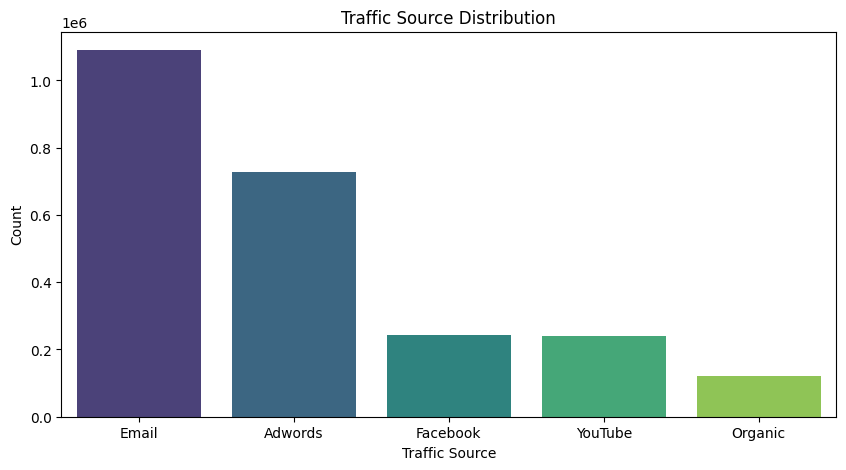

In [34]:
# Traffic Source Distribution

traffic_counts = events_df['traffic_source'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.title('Traffic Source Distribution')
plt.show()

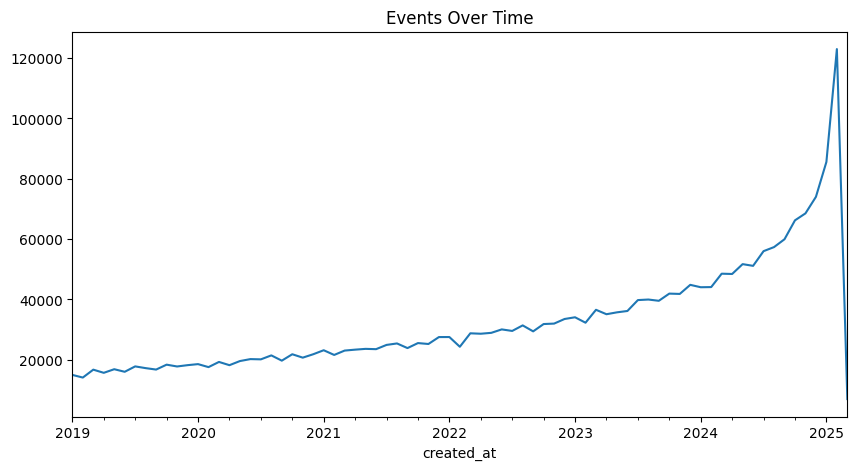

In [35]:
# vents over time plot
plt.figure(figsize=(10,5))
events_df.resample('M', on='created_at').size().plot(kind='line', title="Events Over Time")
plt.show()

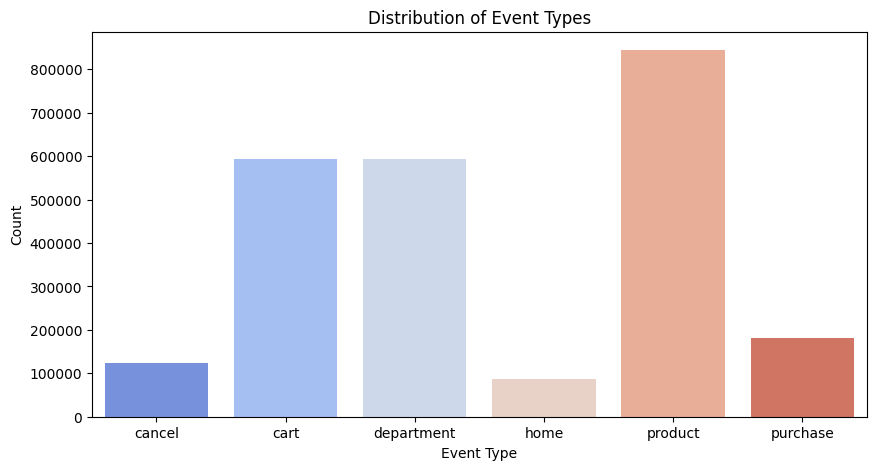

In [36]:
# Event Type Distribution

plt.figure(figsize=(10, 5))
sns.countplot(x=events_df['event_type'], palette='coolwarm')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Distribution of Event Types')
plt.show()


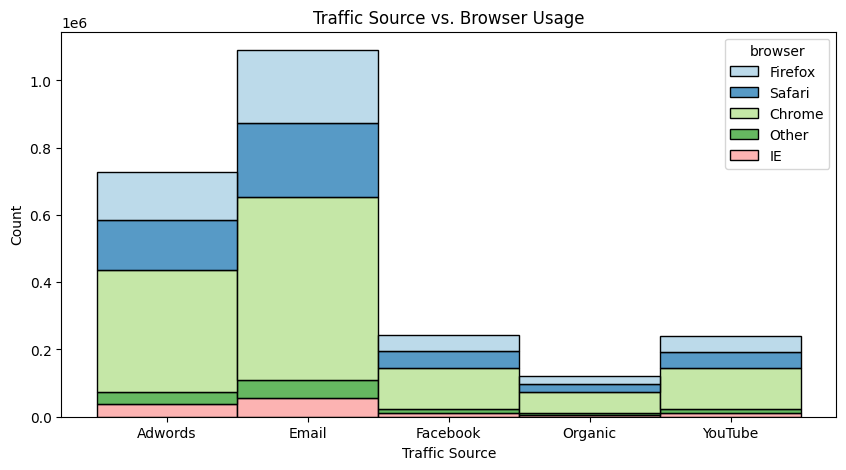

In [37]:
# Traffic Source vs. Browser Usage
plt.figure(figsize=(10, 5))
sns.histplot(data=events_df, x='traffic_source', hue='browser', multiple='stack', palette='Paired')
plt.xlabel('Traffic Source')
plt.ylabel('Count')
plt.title('Traffic Source vs. Browser Usage')
plt.show()


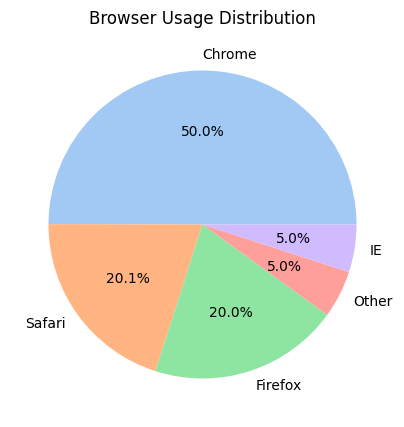

In [38]:
#Browser Usage Distribution

plt.figure(figsize=(5,5))
events_df['browser'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Browser Usage Distribution')
plt.show()


### **Inventory_items_df**

In [39]:
inventory_items_df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,174007,13844,2024-02-05 02:42:19+00:00,2024-03-21 09:40:19+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,174008,13844,2021-05-07 16:51:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,285283,13844,2025-01-23 22:57:15+00:00,2025-02-19 12:48:15+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,285284,13844,2021-06-12 11:53:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,317441,13844,2022-06-28 16:42:28+00:00,2022-08-22 01:26:28+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [40]:
inventory_items_df.shape

(489755, 12)

In [41]:
inventory_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489755 entries, 0 to 489754
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              489755 non-null  Int64              
 1   product_id                      489755 non-null  Int64              
 2   created_at                      489755 non-null  datetime64[us, UTC]
 3   sold_at                         181337 non-null  datetime64[us, UTC]
 4   cost                            489755 non-null  float64            
 5   product_category                489755 non-null  object             
 6   product_name                    489755 non-null  object             
 7   product_brand                   489755 non-null  object             
 8   product_retail_price            489755 non-null  float64            
 9   product_department              489755 non-null  object             
 

In [42]:
inventory_items_df.describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,489755.0,489755.0,489755.000000,489755.000000,489755.0
mean,244878.0,15295.183145,28.650778,59.530261,5.015306
std,141380.234881,8417.107043,30.837803,66.434394,2.895854
min,1.0,1.0,0.008300,0.020000,1.0
25%,122439.5,8027.0,11.418000,24.690001,2.0
50%,244878.0,16028.0,19.875031,39.990002,5.0
75%,367316.5,22573.0,34.534000,69.900002,8.0
max,489755.0,29120.0,557.151002,999.000000,10.0


In [43]:
inventory_items_df.isnull().sum()

,0
id,0
product_id,0
created_at,0
sold_at,308418
cost,0
product_category,0
product_name,0
product_brand,0
product_retail_price,0
product_department,0


In [44]:
# Checking for Duplicates
inventory_items_df.duplicated().sum()

0

In [45]:
# Calculating Profit Margin
inventory_items_df["profit_margin"] = inventory_items_df["product_retail_price"] - inventory_items_df["cost"]
inventory_items_df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,profit_margin
0,174007,13844,2024-02-05 02:42:19+00:00,2024-03-21 09:40:19+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
1,174008,13844,2021-05-07 16:51:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
2,285283,13844,2025-01-23 22:57:15+00:00,2025-02-19 12:48:15+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
3,285284,13844,2021-06-12 11:53:00+00:00,NaT,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196
4,317441,13844,2022-06-28 16:42:28+00:00,2022-08-22 01:26:28+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7,4.22196


In [46]:
# Identifying Unsold Items
unsold_items = inventory_items_df[inventory_items_df["sold_at"].isna()]
print(unsold_items.shape)

(308418, 13)


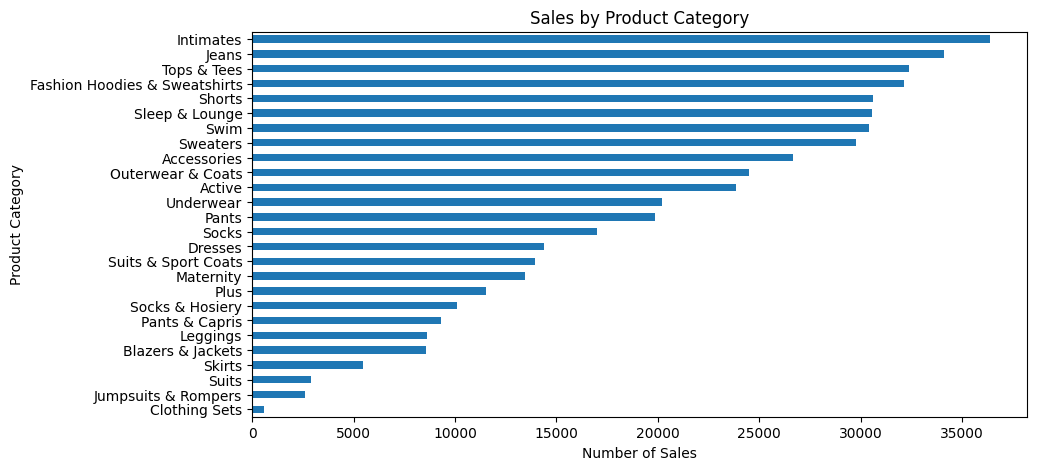

In [47]:
# Sales By Product Category Plot
category_sales = inventory_items_df.groupby("product_category")["id"].count().sort_values(ascending=True)

plt.figure(figsize=(10, 5))
category_sales.plot(kind="barh")

plt.title("Sales by Product Category")
plt.xlabel("Number of Sales")
plt.ylabel("Product Category")
plt.show()


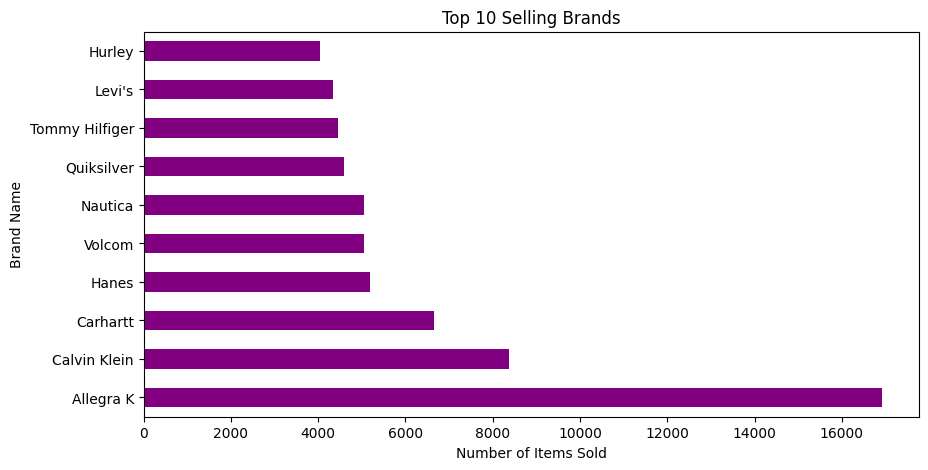

In [48]:
# Top Performing Brands

top_brands = inventory_items_df["product_brand"].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_brands.plot(kind="barh", color="purple")
plt.title("Top 10 Selling Brands")
plt.xlabel("Number of Items Sold")
plt.ylabel("Brand Name")
plt.show()


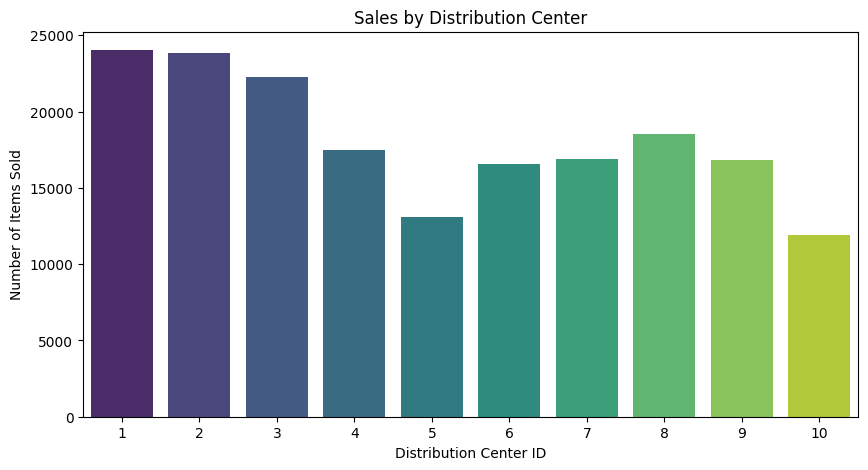

In [49]:
# Sales By DC's Plot

# Filtering for only sold items
sold_items = inventory_items_df[inventory_items_df["sold_at"].notna()]

# sales by distribution center count
dc_sales = sold_items["product_distribution_center_id"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=dc_sales.index, y=dc_sales.values,palette='viridis')
plt.title("Sales by Distribution Center")
plt.xlabel("Distribution Center ID")
plt.ylabel("Number of Items Sold")
plt.show()


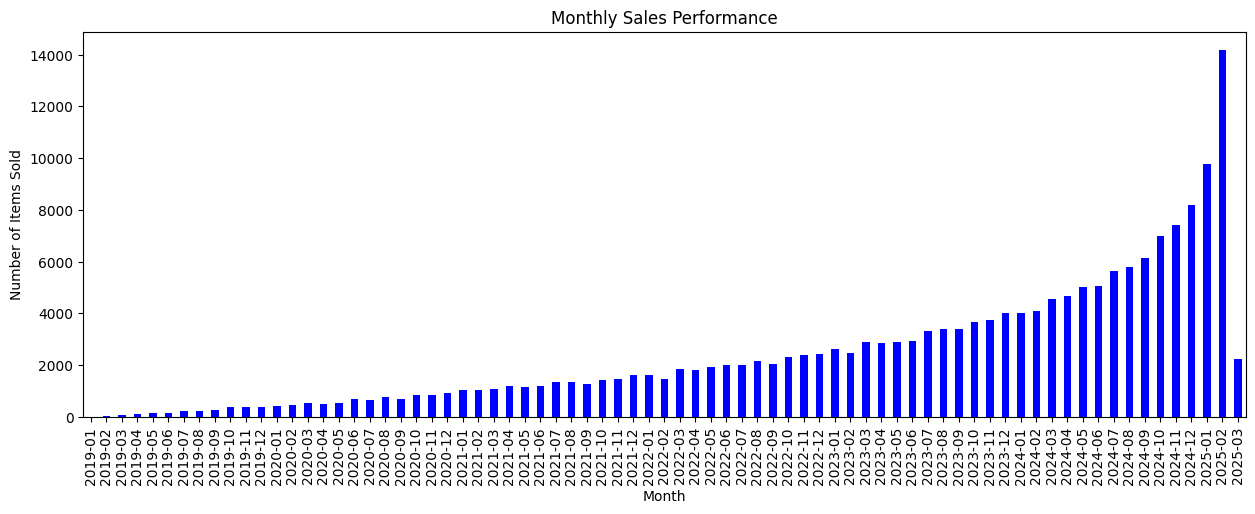

In [50]:
# Monthly Sales Performance Plot

inventory_items_df["sold_month"] = inventory_items_df["sold_at"].dt.to_period("M")
monthly_sales = inventory_items_df.groupby("sold_month")["id"].count()

plt.figure(figsize=(15, 5))
monthly_sales.plot(kind="bar", color="blue")
plt.title("Monthly Sales Performance")
plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.xticks(rotation=90)
plt.show()


### **order_items_df**

In [51]:
order_items_df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,95160,65637,52676,14235,256990,Complete,2024-03-16 17:00:33+00:00,2024-03-16 14:18:00+00:00,2024-03-18 11:30:00+00:00,NaT,0.02
1,152115,104759,83815,14235,410672,Processing,2024-12-13 08:23:19+00:00,NaT,NaT,NaT,0.02
2,149647,103056,82419,14159,404026,Cancelled,2024-05-09 16:30:32+00:00,NaT,NaT,NaT,0.49
3,39361,27072,21689,14159,106296,Complete,2024-09-26 22:11:33+00:00,2024-09-29 02:48:00+00:00,2024-10-02 15:32:00+00:00,NaT,0.49
4,89802,61945,49778,14159,242523,Complete,2025-02-26 07:21:37+00:00,2025-02-27 00:52:00+00:00,2025-02-27 05:13:00+00:00,NaT,0.49


In [52]:
order_items_df.shape

(181337, 11)

In [53]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181337 entries, 0 to 181336
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 181337 non-null  Int64              
 1   order_id           181337 non-null  Int64              
 2   user_id            181337 non-null  Int64              
 3   product_id         181337 non-null  Int64              
 4   inventory_item_id  181337 non-null  Int64              
 5   status             181337 non-null  object             
 6   created_at         181337 non-null  datetime64[us, UTC]
 7   shipped_at         117207 non-null  datetime64[us, UTC]
 8   delivered_at       63084 non-null   datetime64[us, UTC]
 9   returned_at        17970 non-null   datetime64[us, UTC]
 10  sale_price         181337 non-null  float64            
dtypes: Int64(5), datetime64[us, UTC](4), float64(1), object(1)
memory usage: 16.1+ MB


In [54]:
order_items_df.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,181337.0,181337.0,181337.0,181337.0,181337.0,181337.000000
mean,90669.0,62483.714973,50057.843849,15301.935716,244866.141482,59.553142
std,52347.627219,36087.725395,28875.524578,8415.59093,141383.649959,66.423093
min,1.0,1.0,1.0,1.0,2.0,0.020000
25%,45335.0,31254.0,25059.0,8036.0,122408.0,24.870001
50%,90669.0,62521.0,50223.0,16035.0,244888.0,39.990002
75%,136003.0,93787.0,75053.0,22576.0,367250.0,69.900002
max,181337.0,124992.0,100000.0,29120.0,489755.0,999.000000


In [55]:
# Checking for Null Values
order_items_df.isnull().sum()

,0
id,0
order_id,0
user_id,0
product_id,0
inventory_item_id,0
status,0
created_at,0
shipped_at,64130
delivered_at,118253
returned_at,163367


In [56]:
# Checking for Duplicates
order_items_df.duplicated().sum()

0

In [57]:
order_items_df['status'].value_counts()

,count
status,
Shipped,54123
Complete,45114
Processing,36840
Cancelled,27290
Returned,17970


In [58]:
order_items_df.nunique()

,0
id,181337
order_id,124992
user_id,80047
product_id,29059
inventory_item_id,181337
status,5
created_at,181165
shipped_at,78976
delivered_at,42949
returned_at,12413


In [59]:
# Earliest and latest order dates:
order_items_df[['created_at', 'delivered_at']].agg(['min', 'max'])

,created_at,delivered_at
min,2019-01-14 02:41:45+00:00,2019-01-15 00:56:00+00:00
max,2025-03-05 18:14:59.892999+00:00,2025-03-08 12:43:41.291230+00:00


In [60]:
# Orders per fiscal month:
order_items_df['created_at'] = pd.to_datetime(order_items_df['created_at'])
order_items_df['created_month'] = order_items_df['created_at'].dt.to_period('M')
order_items_df['created_month'].value_counts().sort_index()

,count
created_month,
2019-01,5
2019-02,39
2019-03,70
2019-04,91
2019-05,162
...,...
2024-11,7408
2024-12,8203
2025-01,9778


In [61]:
# Average order value
order_items_df.groupby('order_id')['sale_price'].sum().mean()

# Alternate SQL
# SELECT AVG(order_total) AS avg_order_value
# FROM (
#     SELECT order_id, SUM(sale_price) AS order_total
#     FROM order_items
#     GROUP BY order_id
# ) AS order_totals;


86.39903514780214

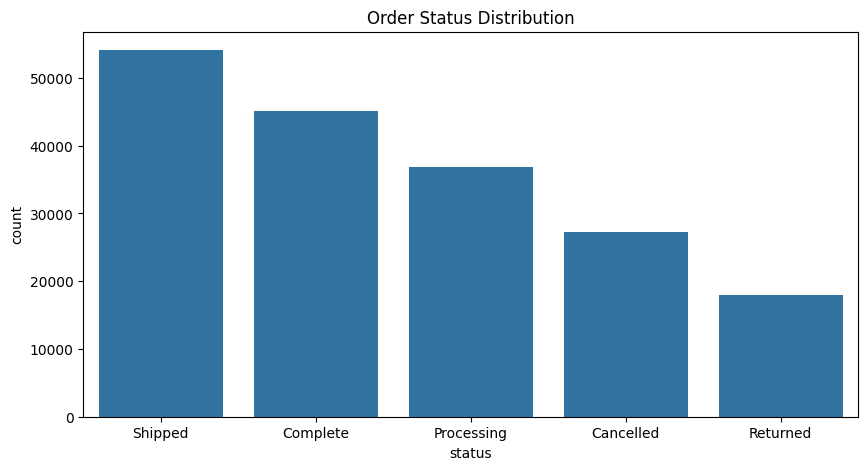

In [62]:
# Order Status Distribution Plot

plt.figure(figsize=(10, 5))
sns.countplot(data=order_items_df, x='status', order=order_items_df['status'].value_counts().index)
plt.title("Order Status Distribution")
plt.show()

<Axes: title={'center': 'Top 10 Best-Selling Products'}, xlabel='product_id'>

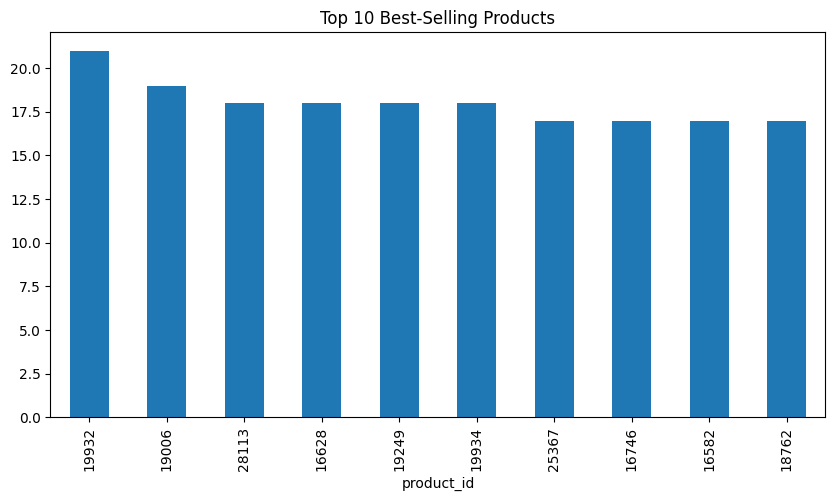

In [63]:
top_products = order_items_df['product_id'].value_counts().nlargest(10)
top_products.plot(kind='bar', figsize=(10, 5), title="Top 10 Best-Selling Products")


### **orders_df**

In [64]:
orders_df.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,7,6,Cancelled,F,2024-07-05 14:50:00+00:00,NaT,NaT,NaT,1
1,8,8,Cancelled,F,2024-09-08 02:56:00+00:00,NaT,NaT,NaT,1
2,35,34,Cancelled,F,2022-01-08 11:09:00+00:00,NaT,NaT,NaT,1
3,57,53,Cancelled,F,2021-12-25 18:35:00+00:00,NaT,NaT,NaT,1
4,65,62,Cancelled,F,2024-03-03 13:28:00+00:00,NaT,NaT,NaT,1


In [65]:
orders_df.shape

(124992, 9)

In [66]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124992 entries, 0 to 124991
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124992 non-null  Int64              
 1   user_id       124992 non-null  Int64              
 2   status        124992 non-null  object             
 3   gender        124992 non-null  object             
 4   created_at    124992 non-null  datetime64[us, UTC]
 5   returned_at   12459 non-null   datetime64[us, UTC]
 6   shipped_at    80860 non-null   datetime64[us, UTC]
 7   delivered_at  43500 non-null   datetime64[us, UTC]
 8   num_of_item   124992 non-null  Int64              
dtypes: Int64(3), datetime64[us, UTC](4), object(2)
memory usage: 8.9+ MB


In [67]:
orders_df.describe()

,order_id,user_id,num_of_item
count,124992.0,124992.0,124992.0
mean,62496.5,50068.171459,1.450789
std,36082.226761,28871.116141,0.806261
min,1.0,1.0,1.0
25%,31248.75,25054.75,1.0
50%,62496.5,50200.5,1.0
75%,93744.25,75021.25,2.0
max,124992.0,100000.0,4.0


In [68]:
# Checking for Null Values
orders_df.isnull().sum()

,0
order_id,0
user_id,0
status,0
gender,0
created_at,0
returned_at,112533
shipped_at,44132
delivered_at,81492
num_of_item,0


In [69]:
# Checking for Duplicates
orders_df.duplicated().sum()

0

In [70]:
# Orders By Gender distribution
gender_distribution = orders_df['gender'].value_counts(normalize=True) * 100
print(gender_distribution.round(2).astype(str) + '%')


gender
M    50.24%
F    49.76%
Name: proportion, dtype: object


In [71]:
# Total cancellation_rate
cancellation_rate = (orders_df['status'] == 'Cancelled').mean()
print(f"Cancellation Rate: {cancellation_rate * 100:.2f}%")

Cancellation Rate: 15.01%


###**products_df**

In [72]:
products_df.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [73]:
products_df.shape

(29120, 9)

In [74]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  Int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  Int64  
dtypes: Int64(2), float64(2), object(5)
memory usage: 2.1+ MB


In [75]:
products_df.describe()

,id,cost,retail_price,distribution_center_id
count,29120.0,29120.000000,29120.000000,29120.0
mean,14560.5,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.0,0.008300,0.020000,1.0
25%,7280.75,11.275613,24.000000,2.0
50%,14560.5,19.675081,39.990002,5.0
75%,21840.25,34.440000,69.949997,8.0
max,29120.0,557.151002,999.000000,10.0


In [76]:
# Checking for Null Values
products_df.isnull().sum()

,0
id,0
cost,0
category,0
name,2
brand,24
retail_price,0
department,0
sku,0
distribution_center_id,0


In [77]:
# Checking for Duplicates
products_df.duplicated().sum()

0

In [78]:
# unique values count per column
products_df[['category', 'brand', 'name', 'department']].nunique()

,0
category,26
brand,2756
name,27309
department,2


In [79]:
products_df['category'].value_counts()

,count
category,
Intimates,2363
Jeans,1999
Tops & Tees,1868
Fashion Hoodies & Sweatshirts,1866
Swim,1798
Sleep & Lounge,1771
Shorts,1765
Sweaters,1737
Accessories,1559


In [80]:
products_df['brand'].value_counts()

,count
brand,
Allegra K,1034
Calvin Klein,497
Carhartt,388
Hanes,308
Volcom,292
...,...
Legendary Apparel,1
NygÃ¥rd Collection,1
A Christmas Story,1


In [81]:
products_df['department'].value_counts()

,count
department,
Women,15989
Men,13131


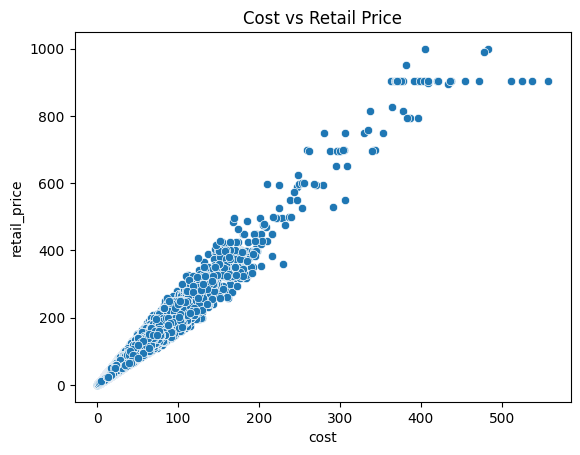

In [82]:
# Retail Price vs Cost Scatter Plot
sns.scatterplot(x='cost', y='retail_price', data=products_df)
plt.title("Cost vs Retail Price")
plt.show()

### **users_df**

In [83]:
users_df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,80874,Willie,Gomez,williegomez@example.org,52,M,Acre,461 Sarah Ferry,69980-000,null,Brasil,-8.065346,-72.870949,Search,2025-01-16 10:13:00+00:00,POINT(-72.87094866 -8.065346116)
1,26461,Emily,Fox,emilyfox@example.net,32,F,Acre,9310 Gallagher Groves Apt. 575,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-09-16 05:40:00+00:00,POINT(-72.87094866 -8.065346116)
2,49626,David,Nelson,davidnelson@example.net,60,M,Acre,7879 Franklin Wall,69980-000,null,Brasil,-8.065346,-72.870949,Search,2019-12-30 00:03:00+00:00,POINT(-72.87094866 -8.065346116)
3,11755,Rita,Smith,ritasmith@example.net,39,F,Acre,0393 Nicole Camp Apt. 654,69980-000,null,Brasil,-8.065346,-72.870949,Search,2022-02-23 11:20:00+00:00,POINT(-72.87094866 -8.065346116)
4,35020,Cindy,Vaughn,cindyvaughn@example.net,66,F,Acre,8519 Brandon Turnpike,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-04-17 05:30:00+00:00,POINT(-72.87094866 -8.065346116)


In [84]:
users_df.shape

(100000, 16)

In [85]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   id              100000 non-null  Int64              
 1   first_name      100000 non-null  object             
 2   last_name       100000 non-null  object             
 3   email           100000 non-null  object             
 4   age             100000 non-null  Int64              
 5   gender          100000 non-null  object             
 6   state           100000 non-null  object             
 7   street_address  100000 non-null  object             
 8   postal_code     100000 non-null  object             
 9   city            100000 non-null  object             
 10  country         100000 non-null  object             
 11  latitude        100000 non-null  float64            
 12  longitude       100000 non-null  float64            
 13  traffic_source 

In [86]:
users_df.describe()

,id,age,latitude,longitude
count,100000.0,100000.0,100000.000000,100000.000000
mean,50000.5,41.02442,28.402231,24.502662
std,28867.657797,17.019655,22.010006,89.979684
min,1.0,12.0,-43.172483,-158.164931
25%,25000.75,26.0,26.234394,-51.075962
50%,50000.5,41.0,35.243165,4.433805
75%,75000.25,56.0,40.745493,116.360365
max,100000.0,70.0,64.865194,153.533010


In [87]:
# Checking for Null Values
users_df.isnull().sum()

,0
id,0
first_name,0
last_name,0
email,0
age,0
gender,0
state,0
street_address,0
postal_code,0
city,0


In [88]:
# Checking for Duplicates
products_df.duplicated().sum()

0

In [89]:
users_df['traffic_source'].value_counts()

,count
traffic_source,
Search,69978
Organic,14902
Facebook,6154
Email,4971
Display,3995


In [90]:
users_df['age'].agg(['min', 'max'])

,age
min,12
max,70


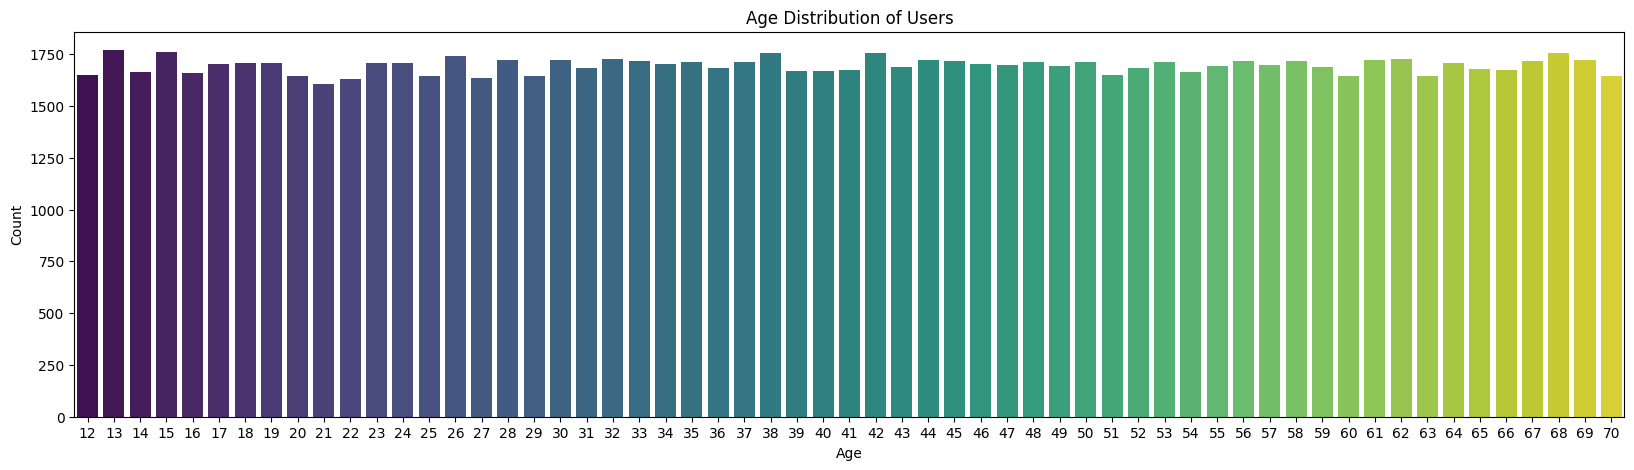

In [91]:
age_counts = users_df['age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(20, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Users")
plt.show()

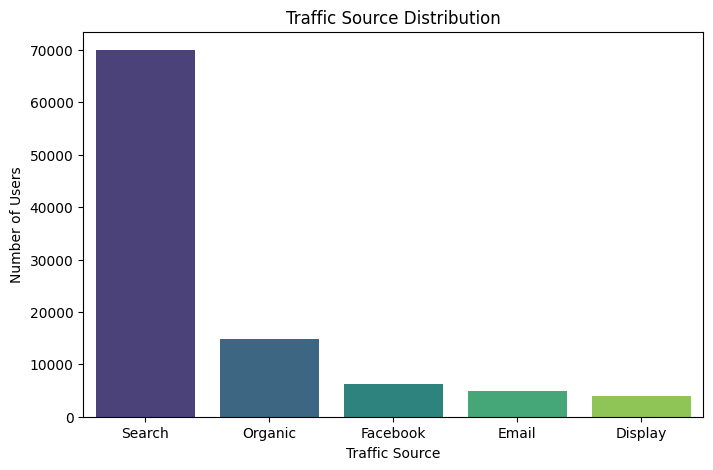

In [92]:
plt.figure(figsize=(8, 5))
sns.barplot(x=users_df['traffic_source'].value_counts().index,
            y=users_df['traffic_source'].value_counts().values,
            palette="viridis")

plt.xlabel("Traffic Source")
plt.ylabel("Number of Users")
plt.title("Traffic Source Distribution")
plt.show()



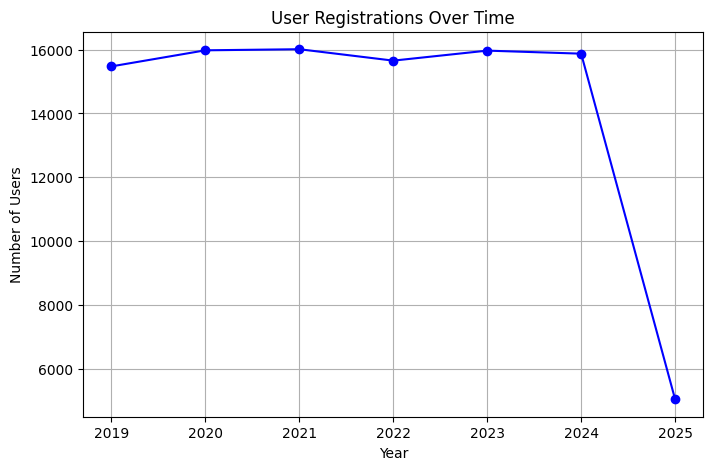

In [93]:
# User registrations per year plot
users_df.groupby(users_df['created_at'].dt.year).size().plot(kind='line', marker='o', figsize=(8,5), color='b')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.title('User Registrations Over Time')
plt.grid(True)
plt.show()

In [94]:
import folium
import pandas as pd

country_counts = users_df.groupby('country').size().reset_index(name='num_users')
map_center = [users_df['latitude'].mean(), users_df['longitude'].mean()]
user_map = folium.Map(location=map_center, zoom_start=3)

for _, row in country_counts.iterrows():
    country_data = users_df[users_df['country'] == row['country']]
    avg_lat, avg_lon = country_data['latitude'].mean(), country_data['longitude'].mean()
    folium.Marker(
        location=[avg_lat, avg_lon],
        tooltip=f"{row['country']}: {row['num_users']} users",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(user_map)

user_map

## **Sales Overview**

**1.  Total Sales Revenue, Total Cost of Goods, Total Gross Profit**

In [95]:
# Merge order_items_df with products_df to get cost & sale price
sales_data = order_items_df.merge(products_df, left_on="product_id", right_on="id")

# Filter only completed orders
sales_data = sales_data[sales_data["status"] == "Complete"]

# Calculate total revenue, total cost, and gross profit
total_revenue = sales_data["sale_price"].sum()
total_cost = sales_data["cost"].sum()
total_gross_profit = total_revenue - total_cost

# Print results
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Cost of Goods: ${total_cost:,.2f}")
print(f"Total Gross Profit: ${total_gross_profit:,.2f}")


Total Revenue: $2,697,526.43
Total Cost of Goods: $1,297,629.37
Total Gross Profit: $1,399,897.07


This e-commerce store has invested $1.3 million in products, generating $2.7 million in sales and achieving a strong $1.4 million in gross profit. With an impressive 51.9% gross margin, this highlights the store’s exceptional financial performance, efficient operations, and strategic pricing.

**2. Finding the Top 10 Profitable Brands**

In [96]:
# Calculate brand performance
brand_performance = sales_data.groupby("brand").apply(lambda x: (x["sale_price"] - x["cost"]).sum()).reset_index()
brand_performance.columns = ["brand", "total_profit"]

# Get top 10 profitable brands
top_performers = brand_performance.sort_values(by="total_profit", ascending=False).head(10)

# Create bar chart
fig = px.bar(top_performers,
             x="brand",
             y="total_profit",
             color="brand",
             labels={"brand": "Brands", "total_profit": "Total Profit"})

fig.update_layout(title_text="10 Most Profitable Brands")

# Show chart
fig.show()

**Calvin Klein** leads as the top profit generator with **$27,262.92**, followed by Diesel and True Religion. Meanwhile, Joe's Jeans, Oakley, and Ray-Ban show the lowest profits among the top 10 brands, indicating room for growth. Investing more in top-performing brands while boosting lower-performing ones can further enhance overall profitability.

**3. Contribution of the Top 10 Brands to Overall Profit**


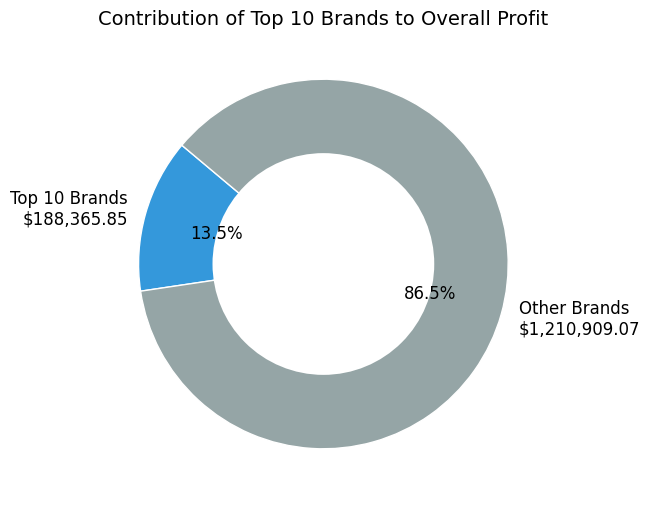

In [97]:
# Calculate total profit across all brands
total_profit_all = brand_performance["total_profit"].sum()

# Total profit of top 10 brands
top_10_profit = top_performers["total_profit"].sum()

# Contribution of top 10 brands over overall profit
top_10_contribution = (top_10_profit / total_profit_all) * 100

# Data for visualization
labels = [f"Top 10 Brands\n${top_10_profit:,.2f}", f"Other Brands\n${(total_profit_all - top_10_profit):,.2f}"]
sizes = [top_10_profit, total_profit_all - top_10_profit]
colors = ["#3498db", "#95a5a6"]

# Create donut chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140,
    wedgeprops={"edgecolor": "white"}, textprops={'fontsize': 12}
)

# Create a donut hole
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white"))

# Add title
plt.title("Contribution of Top 10 Brands to Overall Profit", fontsize=14)

# Show plot
plt.show()


With a diverse array of **2,756 brands** available in our store, the Top 10 performers represent only **0.36%** of the total brand portfolio. Despite their limited number, these elite brands contribute a remarkable **13.5%** to the total profit generated by our business. This highlights their significant financial influence and underscores the strategic importance of understanding and nurturing these high-performing brands for the overall success of our e-commerce platform.

**4. Best Selling Products by Revenue & Quantity Sold**

In [98]:
# Aggregate by product name: Total Revenue & Quantity Sold
best_selling_products = sales_data.groupby("name").agg(
    total_revenue=("sale_price", "sum"),
    total_quantity_sold=("product_id", "count")
).reset_index()

# Sort by revenue and quantity sold
best_by_revenue = best_selling_products.sort_values(by="total_revenue", ascending=False).head(10)
best_by_quantity = best_selling_products.sort_values(by="total_quantity_sold", ascending=False).head(10)

# Print results
print("Top 10 Products by Revenue")
best_by_revenue

# SELECT
#     p.name AS product_name,
#     SUM(o.sale_price) AS total_revenue,
#     COUNT(o.product_id) AS total_quantity_sold
# FROM order_items_df o
# JOIN products_df p ON o.product_id = p.id
# WHERE o.status = 'Complete'
# GROUP BY product_name
# ORDER BY total_revenue DESC
# LIMIT 10;

Top 10 Products by Revenue


,name,total_revenue,total_quantity_sold
4333,Canada Goose Women's Solaris,4170.000000,6
13863,Mountain Hardwear Men's Nilas Down Jacket,3900.000000,6
14030,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,3612.000000,4
18954,The North Face Apex Bionic Soft Shell Jacket -...,3612.000000,4
18973,The North Face Women's S-XL Oso Jacket,3612.000000,4
18958,The North Face Denali Down Womens Jacket 2013,3612.000000,4
14569,Nobis Yatesy Parka,2850.000000,3
19645,True Religion Men's Ricky Straight Jean,2759.900024,12
18952,The North Face Apex Bionic Jacket - Men's,2709.000000,3
18964,The North Face Nuptse 2 Jacket - Noah Green/TN...,2709.000000,3


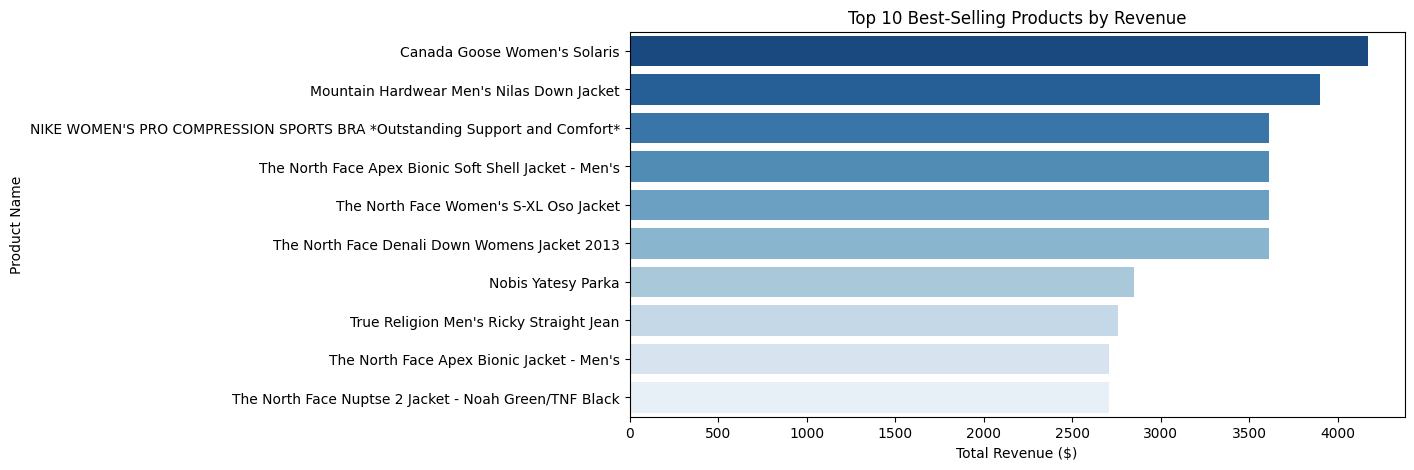

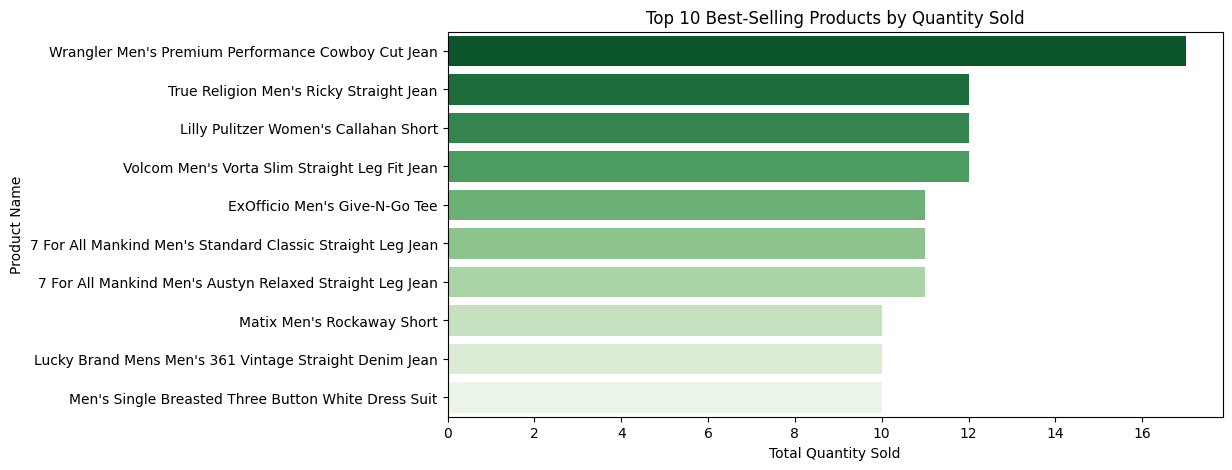

In [99]:
# Plot Top 10 Products by Revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=best_by_revenue["total_revenue"], y=best_by_revenue["name"], palette="Blues_r")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products by Revenue")
# plt.gca().invert_yaxis()  # Invert to show highest first
plt.show()

# Plot Top 10 Products by Quantity Sold
plt.figure(figsize=(10, 5))
sns.barplot(x=best_by_quantity["total_quantity_sold"], y=best_by_quantity["name"], palette="Greens_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products by Quantity Sold")
# plt.gca().invert_yaxis()
plt.show()


In [100]:
# Merging Complete Orders with Products
orders_merged = pd.merge(order_items_df, products_df, left_on ='product_id', right_on ='id', how='left')
orders_merged['profit'] = orders_merged['sale_price'] - orders_merged['cost']

#Formating the date columns
orders_merged[['created_at', 'shipped_at', 'delivered_at']] =\
orders_merged[['created_at', 'shipped_at', 'delivered_at']].apply(lambda col: pd.to_datetime(col, errors='coerce', format='mixed'))

#Only including completed orders
orders_complete_merged = orders_merged.loc[orders_merged['status'] == 'Complete'].copy()

#Grouping By Year
grouped_by_year = orders_complete_merged.groupby(orders_complete_merged['delivered_at'].dt.date)[['profit', 'sale_price', 'cost']].sum().reset_index()

#Creating a seven day rolling average
for column in ['profit', 'sale_price', 'cost']:
    grouped_by_year[column+'_7day_avg'] = grouped_by_year[column].rolling(window=7).mean()
grouped_by_year = grouped_by_year.dropna()

fig = px.line(grouped_by_year,
              x='delivered_at',
              y=['profit_7day_avg', 'sale_price_7day_avg', 'cost_7day_avg'],
              hover_data={'delivered_at': '|%d-%b-%Y'},
              labels=dict(value='$',
                          delivered_at='Date',
                          variable='Metric'))

fig.show()

**5. Average Order Value By Months**

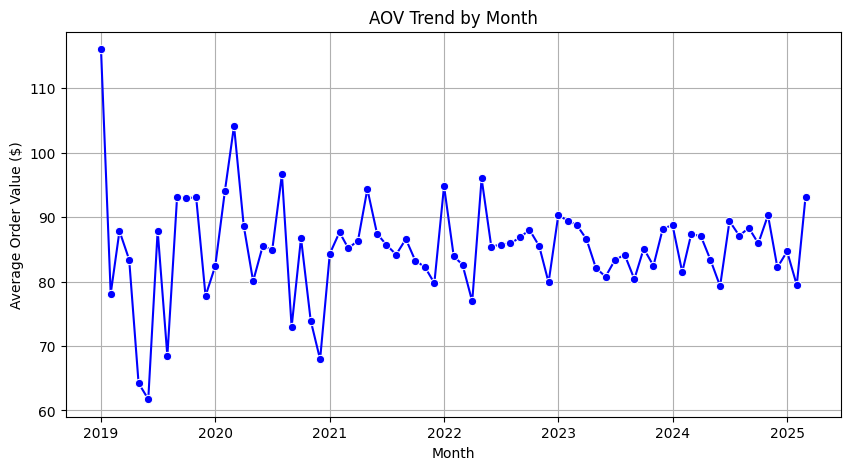

In [101]:
# Merge orders with order items to get sale prices
completed_orders = order_items_df.merge(orders_df, on="order_id")
completed_orders = completed_orders[completed_orders["status_x"] == "Complete"]

# Extract Year-Month for grouping
completed_orders["order_month"] = completed_orders["created_at_x"].dt.to_period("M")

# Calculate Total Revenue & Number of Orders per Month
aov_by_month = completed_orders.groupby("order_month").agg(
    total_revenue=("sale_price", "sum"),
    total_orders=("order_id", "nunique")
).reset_index()

# Compute AOV
aov_by_month["AOV"] = aov_by_month["total_revenue"] / aov_by_month["total_orders"]

# Convert 'order_month' back to datetime for visualization
aov_by_month["order_month"] = aov_by_month["order_month"].astype(str) + "-01"
aov_by_month["order_month"] = pd.to_datetime(aov_by_month["order_month"])

# # Display results
# aov_by_month[["order_month", "AOV"]]

# Plot AOV Trend using Seaborn & Matplotlib
plt.figure(figsize=(10, 5))
sns.lineplot(data=aov_by_month, x="order_month", y="AOV", marker="o", color="b")

# Formatting
plt.xlabel("Month")
plt.ylabel("Average Order Value ($)")
plt.title("AOV Trend by Month")
plt.grid(True)
plt.show()

## **Customer Overview**

**1 . Who are our customers?**

In [102]:
# Merge orders with users on user_id
order_items_merged_users_df = order_items_df.merge(users_df, left_on="user_id", right_on="id", how="inner")

# Filter out Cancelled & Returned orders
valid_orders = order_items_merged_users_df[~order_items_merged_users_df["status"].isin(["Cancelled", "Returned"])]

# Group by country and calculate customer stats
customer_stats = valid_orders.groupby("country").agg(
    customers_count=("user_id", "nunique"),
    female=("gender", lambda x: (x == "F").sum()),
    male=("gender", lambda x: (x == "M").sum())
).reset_index()

# Display result
customer_stats = customer_stats.sort_values(by="customers_count", ascending=False).reset_index(drop=True)
customer_stats

,country,customers_count,female,male
0,China,22472,23124,23315
1,United States,14983,15421,15298
2,Brasil,9596,9821,9957
3,South Korea,3478,3528,3609
4,United Kingdom,3090,3148,3274
5,France,3076,3194,3096
6,Germany,2809,2760,2876
7,Spain,2685,2693,2717
8,Japan,1607,1715,1604
9,Australia,1411,1512,1410


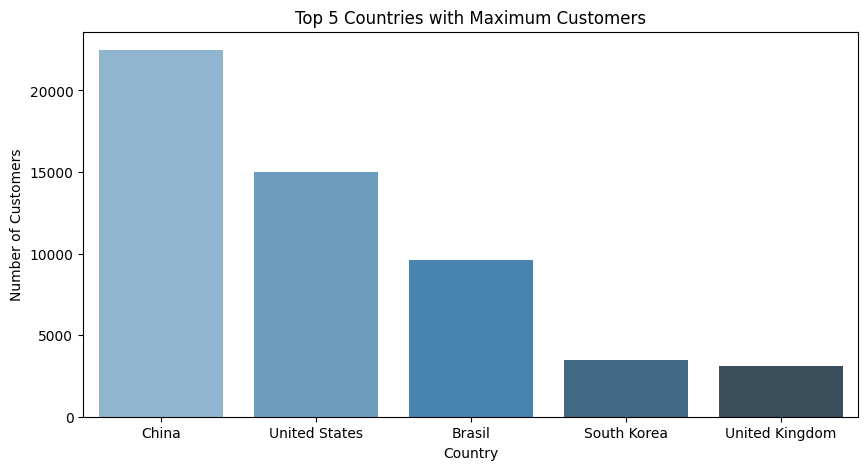

In [103]:
# Top 5 countries
top_countries = customer_stats.head(5)

plt.figure(figsize=(10,5))
sns.barplot(data=top_countries, x="country", y="customers_count", palette="Blues_d")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.title("Top 5 Countries with Maximum Customers")
plt.show()


The majority of the customers come from China, United States then Brazil followed by South Kora and United Kingdom

**2. Customers by Gender**

In [104]:
# Merge order_items with orders on 'order_id'
order_items_merged_orders_df = order_items_df.merge(orders_df, on="order_id", how="left")

# Filter out Cancelled and Returned orders
order_items_merged_orders_df = order_items_merged_orders_df[~order_items_merged_orders_df["status_x"].isin(["Cancelled", "Returned"])]

# Calculate Revenue and Quantity Sold by Gender
customer_analysis = order_items_merged_orders_df.groupby("gender").agg(
    quantity=("num_of_item", "sum")
).reset_index()

# Sort by revenue
customer_analysis = customer_analysis.sort_values(by="quantity", ascending=False)

# Print Summary
customer_analysis

,gender,quantity
1,M,129231
0,F,129212


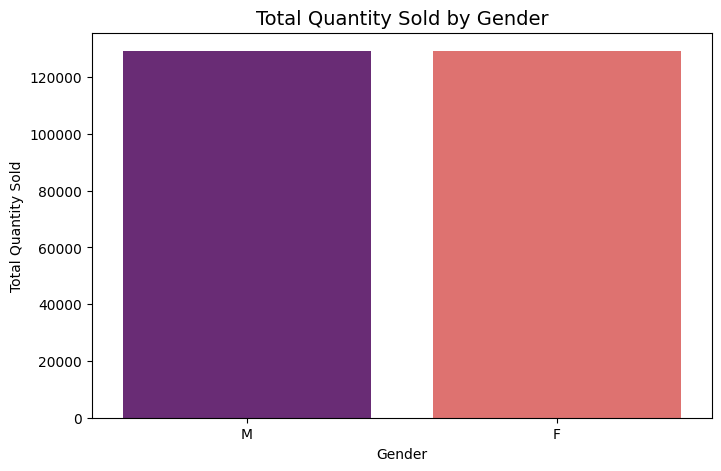

In [105]:
# Quantity Sold by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="quantity", data=customer_analysis, palette="magma")
plt.title("Total Quantity Sold by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Total Quantity Sold")
plt.show()


**3. Customer By Age Group**

In [106]:
# Filter out cancelled and returned orders
filtered_df = order_items_merged_users_df[~order_items_merged_users_df["status"].isin(["Cancelled", "Returned"])]

# Define age groups
def age_category(age):
    if pd.isna(age):
        return "Unknown"
    elif age < 15:
        return "Kids"
    elif 15 <= age <= 24:
        return "Teenager"
    elif 25 <= age <= 50:
        return "Adult"
    else:
        return "Elderly"

# Apply age grouping
filtered_df["age_group"] = filtered_df["age"].apply(age_category)

# Count unique customers per age group
customer_by_age = filtered_df.groupby("age_group")["user_id"].nunique().reset_index()

# Rename columns
customer_by_age.columns = ["Age Group", "Total Customers"]

# Sort by customer count (descending)
customer_by_age = customer_by_age.sort_values(by="Total Customers", ascending=False)

# Display result
customer_by_age

,Age Group,Total Customers
0,Adult,29282
1,Elderly,22338
3,Teenager,11203
2,Kids,3371


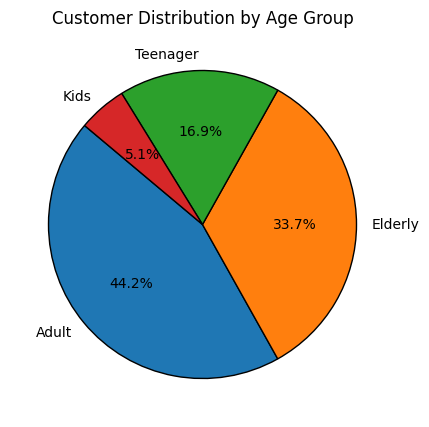

In [107]:
# Pie Plot - Customer By Age Group
plt.figure(figsize=(8, 5))
plt.pie(customer_by_age["Total Customers"], labels=customer_by_age["Age Group"], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Customer Distribution by Age Group")
plt.show()

**5. How many Customers ordered only once all time?**

In [108]:
order_counts = orders_df.groupby("user_id")["order_id"].nunique()
single_order_customers = order_counts[order_counts == 1]
num_single_order_customers = single_order_customers.shape[0]
print(f"Number of customers who ordered only once: {num_single_order_customers}")

Number of customers who ordered only once: 50070


**6. All orders placed with respect to customers by Countries?**

In [109]:
orders_users_merged_df = orders_df.merge(users_df[['id', 'country']], left_on='user_id', right_on='id', how='inner')
result_df = orders_users_merged_df.groupby('country').agg(ORDERS=('order_id', 'nunique'), QUANTITY=('num_of_item', 'sum')).reset_index()
result_df = result_df.sort_values(by='QUANTITY', ascending=False).head(10)
result_df

,country,ORDERS,QUANTITY
3,China,42563,61722
14,United States,28077,40975
2,Brasil,18026,26275
11,South Korea,6629,9519
13,United Kingdom,5965,8601
7,France,5762,8314
8,Germany,5311,7634
12,Spain,5013,7230
9,Japan,3083,4456
0,Australia,2683,3921


**7. Top 10 Customers by Average Order Price**

In [110]:
merged_df = order_items_df.merge(orders_df, on="order_id", how="left")
merged_df = merged_df.merge(users_df, left_on="user_id_x", right_on="id", how="left")
merged_df["User"] = merged_df["first_name"].fillna('') + merged_df["last_name"].fillna('') + merged_df["email"].fillna('')

# AvgOrderPrice
user_avg_price = (
    merged_df.groupby("User")
    .apply(lambda x: round((x["num_of_item"] * x["sale_price"]).mean(), 1))
    .reset_index(name="AvgOrderPrice")
)
top_users = user_avg_price.sort_values(by="AvgOrderPrice", ascending=False).head(10)
top_users["Name"] = top_users["User"].str[:5]
result_df = top_users[["Name", "AvgOrderPrice"]]
result_df


,Name,AvgOrderPrice
10262,Canda,1223.0
67969,Willi,1198.5
16784,Danny,1159.0
46594,Melin,1141.4
33238,Jorge,1127.0
51208,Norma,1112.0
10196,Camer,1103.6
54422,Ricar,1099.0
40255,KyleW,1093.5
13397,Chris,1091.1


**8. Customer Lifetime Value (CLV): Calculate the estimated lifetime value of customers.**

CLV=Average Purchase Value×Purchase Frequency×Customer Lifespan


1.   Average Purchase Value = Total Revenue / Total Orders
2.   Purchase Frequency = Total Orders / Total Customers
3. Customer Lifespan = Average number of days between first and last purchase per customer

In [111]:
merged_df = orders_df.merge(order_items_df, on='order_id', how='inner')

# Calculate total revenue per customer
customer_revenue = merged_df.groupby('user_id_x')['sale_price'].sum().reset_index()
customer_revenue.columns = ['user_id_x', 'total_revenue']

# Calculate total orders per customer
customer_orders = merged_df.groupby('user_id_x')['order_id'].nunique().reset_index()
customer_orders.columns = ['user_id_x', 'total_orders']

# Merge revenue and order count
customer_data = customer_revenue.merge(customer_orders, on='user_id_x')

# Calculate Average Order Value (AOV)
customer_data['AOV'] = customer_data['total_revenue'] / customer_data['total_orders']

# Calculate Purchase Frequency
total_orders = orders_df['order_id'].nunique()
total_customers = users_df['id'].nunique()
purchase_frequency = total_orders / total_customers

# customer lifespan (in years)
customer_lifespan = 5

# Calculate Customer Lifetime Value (CLV)
customer_data['CLV'] = customer_data['AOV'] * purchase_frequency * customer_lifespan

# Display top customers by CLV
customer_data[['user_id_x', 'CLV']].sort_values(by='CLV', ascending=False).head(10)


,user_id_x,CLV
24193,30269,7643.073284
12374,15512,7490.145600
10276,12898,7415.275395
79140,98858,7243.223891
25790,32275,7199.414181
31699,39716,7174.165827
55007,68793,7143.292800
45232,56621,7043.236714
13669,17118,6986.177824
37328,46757,6949.242725


**9. Category customers purchase the most with the first order.**

In [112]:
# Filter out cancelled and returned orders
orders_df = orders_df[~orders_df['status'].isin(['Cancelled', 'Returned'])]

# Identify first order for each user
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])
orders_df['order_sequence'] = orders_df.sort_values(by=['user_id', 'created_at']).groupby('user_id')['created_at'].rank(method='first')

first_orders = orders_df[orders_df['order_sequence'] == 1][['order_id', 'user_id']]

# Join with order_items and products
merged_df = first_orders.merge(order_items_df, on='order_id', how='left').merge(products_df[['id', 'category']], left_on='product_id', right_on='id', how='left')
# Aggregate revenue and user count by category
result = merged_df.groupby('category', dropna=False).agg(revenue=('sale_price', 'sum'),user_count=('user_id_x', 'nunique')).reset_index()

result = result.sort_values(by='revenue', ascending=False).reset_index(drop=True)
result

,category,revenue,user_count
0,Outerwear & Coats,705733.439205,4688
1,Jeans,665442.680910,6536
2,Sweaters,442289.019968,5726
3,Fashion Hoodies & Sweatshirts,346261.570443,6202
4,Suits & Sport Coats,342294.699680,2658
5,Swim,334513.510338,5742
6,Sleep & Lounge,292147.880693,5816
7,Shorts,274864.810779,5834
8,Tops & Tees,266370.121074,6147
9,Intimates,241857.630365,6711


### **Logitistics Overview**

**Location of All Distribution Centers**

In [113]:
fig = go.Figure(data=go.Scattergeo(
    lon = distribution_centers_df['longitude'],
    lat = distribution_centers_df['latitude'],
    text = distribution_centers_df['name'],
    mode = 'markers',
    marker = dict(size= 20),))


fig.update_layout(title_text = 'Locations of All Distribution Centers',
                  geo_scope = 'usa',
                 height = 650,)

fig.show()

**Order Volume by Distribution Center**

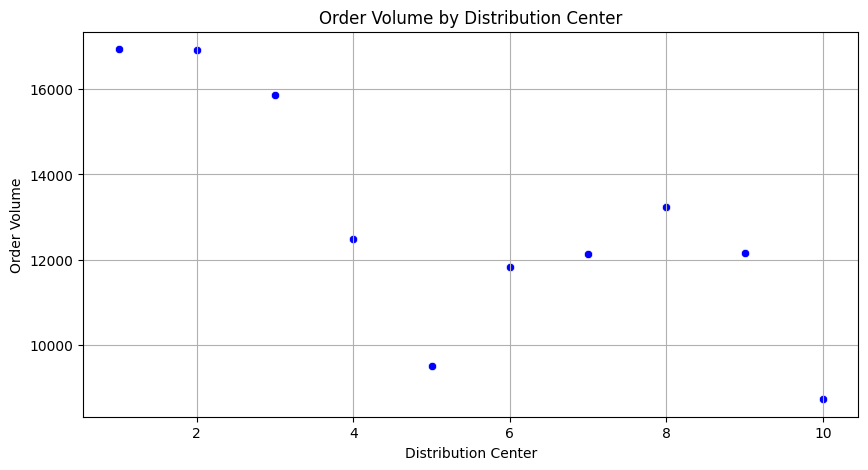

In [114]:
# Merge dataframes to get distribution center for each order
merged_df = (orders_df.merge(order_items_df, on="order_id", how="inner").merge(inventory_items_df, left_on="inventory_item_id", right_on="id", how="inner"))

# Group by distribution center and count orders
order_volume = (merged_df.groupby("product_distribution_center_id")["order_id"].nunique().reset_index().rename(columns={"product_distribution_center_id": "Distribution Center", "order_id": "Order Volume"}))

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=order_volume, x="Distribution Center", y="Order Volume", color="blue")
plt.xlabel("Distribution Center")
plt.ylabel("Order Volume")
plt.title("Order Volume by Distribution Center")
plt.grid(True)
plt.show()


### **Advertising Overview**

In [115]:
# Advertising Conversion Rates
events_source = events_df[['traffic_source','event_type']]
events_source = events_source.groupby(['traffic_source', 'event_type']).size().reset_index(name='count')
events_source

,traffic_source,event_type,count
0,Adwords,cancel,37363
1,Adwords,cart,178533
2,Adwords,department,178612
3,Adwords,home,26236
4,Adwords,product,253722
5,Adwords,purchase,54497
6,Email,cancel,56418
7,Email,cart,267195
8,Email,department,266815
9,Email,home,39401


In [116]:
#Creating Pivot Table To See Conversion Rate of each traffic source
pivot_table = events_source.pivot_table(index='traffic_source', columns='event_type', values='count', fill_value=0)
pivot_table['total_events'] = pivot_table.sum(axis=1)
pivot_table['conversion_rate'] = (pivot_table['purchase'] / pivot_table.drop('total_events', axis = 1).sum(axis=1)) * 100
pivot_table = pivot_table.sort_values(by='conversion_rate', ascending=False).reset_index()

#Plotting bar chart
fig = px.bar(pivot_table,
             x = 'traffic_source',
             y = 'purchase',
             color = 'traffic_source',
             text = [f'Conversion Rate: {rate:.2f}%' for rate in pivot_table['conversion_rate']],
             labels = dict(traffic_source= 'Traffic Source',
                           purchase= 'Total Purchase',
                          text= ''),
            height = 650)

fig.update_traces(textposition='outside')
fig.update_layout(title_text = 'Traffic Source Performance')
fig.show()

The bar chart visualization illustrates the distribution of 'purchase' events and their corresponding conversion rates across various traffic sources. Email stands out prominently with the highest 'purchase' count, 81.39k, and a conversion rate of 7.46%. Following closely is Adwords, contributing 54.49k purchases with a conversion rate of 7.48%. Facebook and Organic exhibit comparable performance, with Facebook achieving 18.30k purchases and a conversion rate of 7.50%, while Organic records 9191 purchases and a conversion rate of 7.52%. YouTube, although slightly trailing behind, still demonstrates a solid performance, registering 17.94k purchases and a conversion rate of 7.44%.

This visual representation highlights the effectiveness of these traffic sources in converting events into successful purchases, emphasizing the robust and consistent nature of the platform's conversion rates.

### **Profits and Revenue Overview**

In [117]:
orders_orderitems = pd.merge(order_items_df, orders_df, left_on=['order_id', 'user_id'],right_on=['order_id','user_id'], how='left', suffixes=('_item', '_order'))
orders_products = pd.merge(orders_orderitems, products_df, left_on=['product_id'],right_on=['id'],how='left',suffixes=('_orderproducts', '_products'))
all_order_data = pd.merge(orders_products, inventory_items_df,left_on= ['inventory_item_id'],right_on= ['id'],how = 'left',suffixes=('_all', '_items'))
all_order_data = pd.merge(all_order_data, users_df, left_on=['user_id'],  right_on=['id'],  how='left', suffixes=('_orders', '_user'))

cancelled_orders = all_order_data[all_order_data['status_item'] == 'Cancelled'].copy()
returned_orders = all_order_data[all_order_data['status_item'] == 'Returned'].copy()
complete_orders = all_order_data[all_order_data['status_item'].isin(['Complete', 'Shipped'])].copy()

complete_orders['inventory_cost'] = complete_orders['cost_items'] * complete_orders['num_of_item']
complete_orders['product_cost'] = complete_orders['cost_all'] * complete_orders['num_of_item']
complete_orders['total_revenue'] = complete_orders['sale_price'] * complete_orders['num_of_item']
complete_orders['total_profit'] = complete_orders['total_revenue'] - complete_orders['inventory_cost']

complete_orders_summary = complete_orders.groupby(['product_id_all', 'name', 'product_category', 'product_department']).agg(
    total_quantity=('num_of_item', 'sum'),
    inventory_cost=('inventory_cost', 'sum'),
    product_cost=('product_cost', 'sum'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('total_profit', 'sum')
).reset_index().sort_values('total_revenue', ascending=False)

#adding profit_per_unit to identify which units are the most profitable
complete_orders_summary['profit_per_unit'] = complete_orders_summary['total_profit'] / complete_orders_summary['total_quantity']
complete_orders_summary['profit_per_unit'] = complete_orders_summary['profit_per_unit'].fillna(0)
complete_orders_summary.head()

,product_id_all,name,product_category,product_department,total_quantity,inventory_cost,product_cost,total_revenue,total_profit,profit_per_unit
8029,8429,The North Face Women's S-XL Oso Jacket,Outerwear & Coats,Women,16,6053.711997,6053.711997,14448.0,8394.288003,524.643
19528,20366,Robert Graham Men's Barbican Velvet Blazer,Suits & Sport Coats,Men,20,6100.519986,6100.519986,13960.0,7859.480014,392.974001
23366,24283,The North Face Nuptse 2 Jacket - Noah Green/TN...,Outerwear & Coats,Men,14,5183.220025,5183.220025,12642.0,7458.779975,532.769998
23424,24341,Nobis Yatesy Parka,Outerwear & Coats,Men,13,4964.700032,4964.700032,12350.0,7385.299968,568.099998
24400,25348,Jordan Low Quarter Sock Style # 427411,Socks,Men,13,6984.705019,6984.705019,11739.0,4754.294981,365.714999


In [118]:
revenue_profit_summary = complete_orders.groupby('product_department').agg(total_revenue_sum=('total_revenue', 'sum'),total_profit_sum=('total_profit', 'sum')).reset_index()
revenue_profit_summary.head(10)

,product_department,total_revenue_sum,total_profit_sum
0,Men,6019668.194765,3119276.790051
1,Women,5287282.826692,2751657.032677


**Breakdown by the Mens department**



In [119]:
men_summary = complete_orders_summary[complete_orders_summary['product_department'] == 'Men'].groupby(['product_department', 'product_category']).agg(
    total_inventory_cost=('inventory_cost','sum'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_quantity=('total_quantity', 'sum')).reset_index().sort_values(by=['total_profit'], ascending=[False])

# Calculate profit per unit
men_summary['profit_per_unit'] = men_summary['total_profit'] / men_summary['total_quantity']

# Ensure no division by zero errors
men_summary['profit_per_unit'] = men_summary['profit_per_unit'].fillna(0)
men_summary.head()

,product_department,product_category,total_inventory_cost,total_revenue,total_profit,total_quantity,profit_per_unit
4,Men,Outerwear & Coats,396713.058989,899809.798725,503096.739736,6041,83.280374
9,Men,Suits & Sport Coats,277421.618156,691381.049525,413959.431369,5471,75.664308
3,Men,Jeans,444837.52717,836189.950552,391352.423382,8123,48.178311
10,Men,Sweaters,282774.055576,564918.52994,282144.474364,7215,39.105263
5,Men,Pants,209862.732308,457727.111562,247864.379254,7658,32.366725


**Breakdown by the Womens department**


In [120]:
women_summary = complete_orders_summary[complete_orders_summary['product_department'] == 'Women'].groupby(['product_department', 'product_category']).agg(
    total_inventory_cost=('inventory_cost','sum'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_quantity=('total_quantity', 'sum')).reset_index().sort_values(by=['total_profit'], ascending=[False])

# Calculate profit per unit
women_summary['profit_per_unit'] = women_summary['total_profit'] / women_summary['total_quantity']

# Ensure no division by zero errors
women_summary['profit_per_unit'] = women_summary['profit_per_unit'].fillna(0)
women_summary.head()

,product_department,product_category,total_inventory_cost,total_revenue,total_profit,total_quantity,profit_per_unit
11,Women,Outerwear & Coats,237329.035783,525856.449903,288527.414121,3606,80.013149
4,Women,Dresses,211304.791197,471183.061578,259878.27038,5587,46.514815
7,Women,Jeans,258785.975625,478644.661311,219858.685686,5138,42.790713
6,Women,Intimates,247604.794847,466432.250694,218827.455847,13737,15.929785
20,Women,Swim,142963.801537,339815.760114,196851.958577,5211,37.776235


In [121]:
complete_orders['year_month'] = complete_orders['created_at_item'].dt.to_period('M')

# Aggregate profit by year and month
profit_trends = complete_orders.groupby(['year_month', 'product_department']).agg(
    total_profit = ('total_profit', 'sum'),
    total_revenue = ('total_revenue', 'sum')
).reset_index()

profit_trends.tail(10)

,year_month,product_department,total_profit,total_revenue
140,2024-11,Men,134833.116612,259572.500207
141,2024-11,Women,110150.982113,212868.290255
142,2024-12,Men,135599.98408,262453.61037
143,2024-12,Women,120984.216899,231780.66029
144,2025-01,Men,176906.396337,341591.370483
145,2025-01,Women,140976.679791,271146.130341
146,2025-02,Men,230554.24891,443765.490238
147,2025-02,Women,210502.619171,402585.290424
148,2025-03,Men,52634.810515,102130.220042
149,2025-03,Women,48246.9028,93501.830027


**Profit trend by department**

<Figure size 1400x800 with 0 Axes>

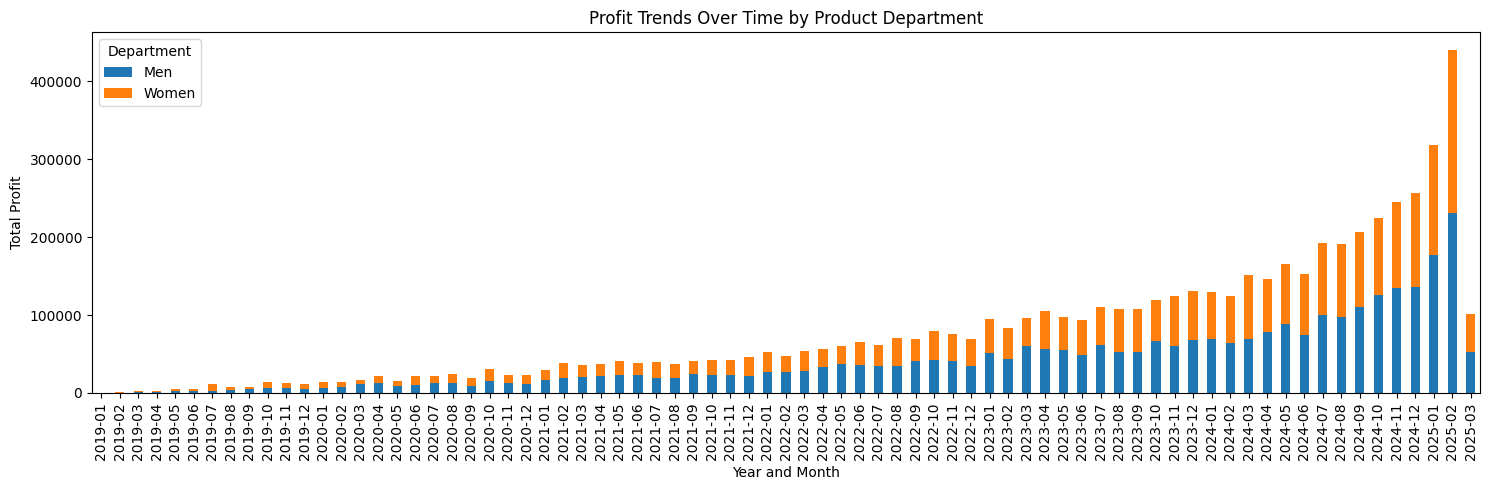

In [122]:
plot_data = complete_orders[['year_month', 'department', 'total_profit']]
plot_data_grouped = plot_data.groupby(['year_month', 'department'])['total_profit'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
plot_data_grouped.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Profit Trends Over Time by Product Department')
plt.xlabel('Year and Month')
plt.ylabel('Total Profit')
plt.legend(title='Department')
plt.tight_layout()
plt.show()

**Plotting both profit and revenue trends over time for Men and Women departments**

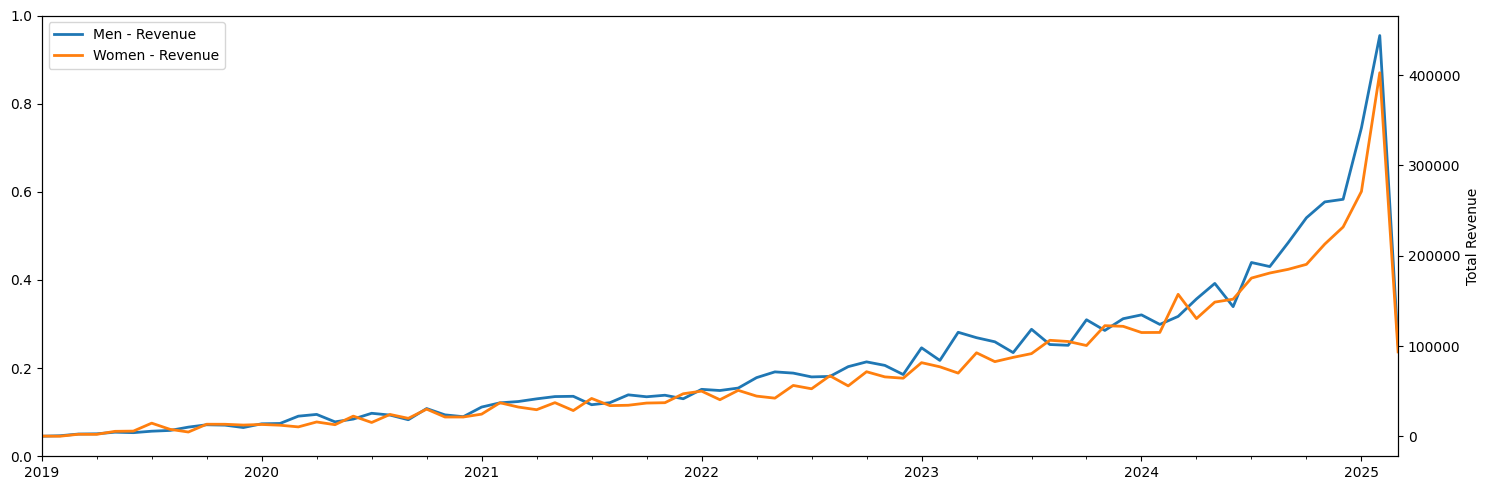

In [123]:

plot_data_combined = profit_trends.pivot(index='year_month', columns='product_department', values=['total_profit', 'total_revenue'])

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

# Creating a second y-axis for revenue line graph
ax2 = ax1.twinx()
plot_data_combined['total_revenue'].plot(ax=ax2, linewidth=2)
ax2.set_ylabel('Total Revenue', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.legend(['Men - Revenue', 'Women - Revenue'], loc='upper left')
plt.show()

**Total Revenue by Country per Year**

<Figure size 1400x800 with 0 Axes>

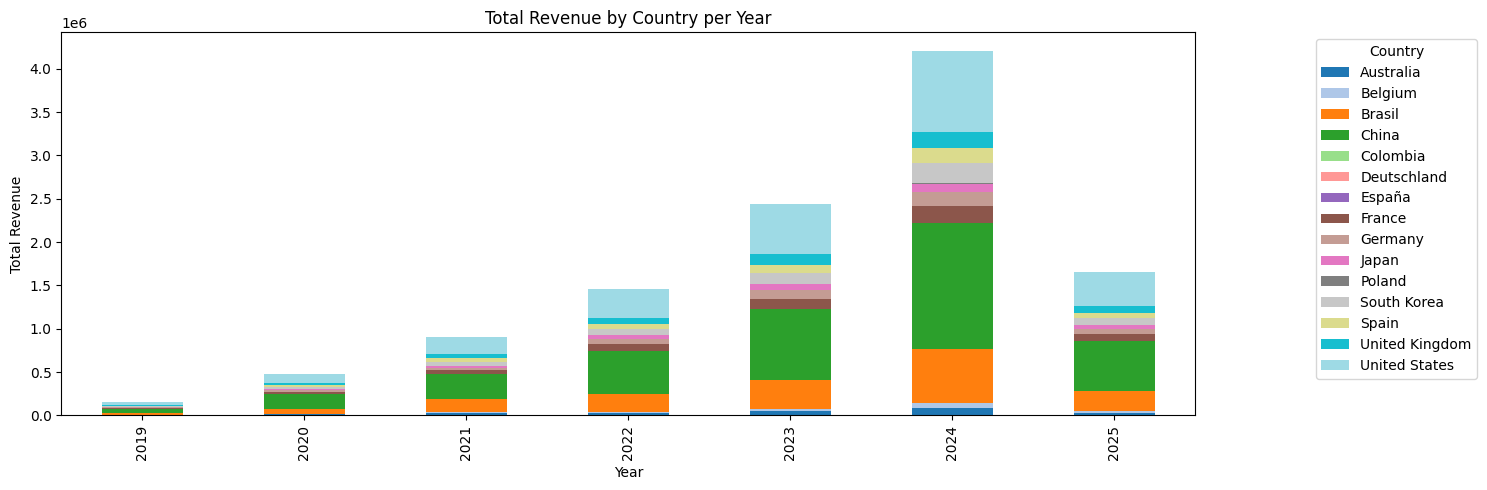

In [124]:
complete_orders['year'] = complete_orders['created_at_item'].dt.to_period('Y')
revenue_by_year_country = complete_orders.groupby(['year', 'country'])['total_revenue'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
ax = revenue_by_year_country.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 5))
plt.title('Total Revenue by Country per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [125]:
country_analysis = complete_orders.groupby('country').agg(
    transactions=('order_id', 'nunique'),  # Count unique orders as transactions
    total_revenue=('total_revenue', 'sum')
).reset_index().sort_values(by='transactions', ascending=False)

countries_by_transactions = country_analysis.sort_values(by='transactions', ascending=False)
countries_by_revenue = country_analysis.sort_values(by='total_revenue', ascending=False)

In [126]:
country_analysis

,country,transactions,total_revenue
3,China,23361,3857734.283508
14,United States,15406,2589687.362255
2,Brasil,9834,1647993.57165
11,South Korea,3632,606224.720708
13,United Kingdom,3242,523085.260339
7,France,3160,526737.510935
8,Germany,2882,444341.550598
12,Spain,2688,449385.120778
9,Japan,1715,266684.370167
0,Australia,1460,227809.660121


### **Returned Orders Overview**

In [127]:
status_counts = all_order_data['status_item'].value_counts()

status_percentages = (status_counts / all_order_data.shape[0]) * 100

# Combining counts and percentages into a single dataframe
status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentages
}).reset_index().rename(columns={'index': 'Status'})

status_summary

,status_item,Count,Percentage
0,Shipped,54123,29.846639
1,Complete,45114,24.878541
2,Processing,36840,20.315766
3,Cancelled,27290,15.049328
4,Returned,17970,9.909726


9.9 % or orders were returned and 15% were cancelled.

In [128]:
returned_orders.head()

,id_orderproducts,order_id,user_id,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,...,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user,user_geom
8,78813,54345,43637,14159,212906,Returned,2024-07-18 00:29:19+00:00,2024-07-18 06:56:00+00:00,2024-07-22 10:52:00+00:00,2024-07-22 17:47:00+00:00,...,Seoul,13703 Jones Neck Suite 738,132-023,Seoul,South Korea,37.664109,127.023641,Search,2019-05-06 01:22:00+00:00,POINT(127.0236408 37.66410876)
32,127445,87887,70431,14298,344195,Returned,2021-07-18 05:32:50+00:00,2021-07-16 09:35:00+00:00,2021-07-17 07:41:00+00:00,2021-07-17 21:07:00+00:00,...,England,574 Joseph Ranch,BS30,Wick,United Kingdom,51.447800,-2.441571,Search,2021-04-30 08:26:00+00:00,POINT(-2.441570567 51.44780005)
48,112369,77459,62124,15332,303581,Returned,2022-03-03 14:08:43+00:00,2022-02-28 17:20:00+00:00,2022-03-04 05:23:00+00:00,2022-03-05 15:02:00+00:00,...,England,344 Flores Lock,B74,The Royal Town of Sutton Coldfield,United Kingdom,52.581559,-1.861769,Organic,2020-06-16 16:07:00+00:00,POINT(-1.861768752 52.5815595)
57,149287,102820,82227,9043,403076,Returned,2021-01-28 01:33:27+00:00,2021-01-29 08:36:00+00:00,2021-01-30 18:34:00+00:00,2021-02-02 04:03:00+00:00,...,Texas,2281 Shannon Points Apt. 586,76401,Stephenville,United States,32.294877,-98.217614,Search,2020-08-11 04:29:00+00:00,POINT(-98.21761354 32.29487684)
71,33796,23247,18623,14549,91259,Returned,2025-02-27 05:16:19.867956+00:00,2025-03-01 06:33:01.867956+00:00,2025-03-05 08:48:01.867956+00:00,2025-03-07 14:17:01.867956+00:00,...,Paraná,5768 Marcus Underpass Apt. 815,87140-000,Paiçandu,Brasil,-23.465219,-52.122462,Search,2025-02-24 05:40:01.867956+00:00,POINT(-52.12246192 -23.4652187)


In [129]:
returned_orders.columns

Index(['id_orderproducts', 'order_id', 'user_id', 'product_id_all',
       'inventory_item_id', 'status_item', 'created_at_item',
       'shipped_at_item', 'delivered_at_item', 'returned_at_item',
       'sale_price', 'created_month', 'status_order', 'gender_orders',
       'created_at_order', 'returned_at_order', 'shipped_at_order',
       'delivered_at_order', 'num_of_item', 'order_sequence', 'id_products',
       'cost_all', 'category', 'name', 'brand', 'retail_price', 'department',
       'sku', 'distribution_center_id', 'id_orders', 'product_id_items',
       'created_at_orders', 'sold_at', 'cost_items', 'product_category',
       'product_name', 'product_brand', 'product_retail_price',
       'product_department', 'product_sku', 'product_distribution_center_id',
       'profit_margin', 'sold_month', 'id_user', 'first_name', 'last_name',
       'email', 'age', 'gender_user', 'state', 'street_address', 'postal_code',
       'city', 'country', 'latitude', 'longitude', 'traffic_sourc

**Most Returned Product**

In [130]:
most_returned = returned_orders['product_name'].value_counts().reset_index()
most_returned.columns = ['Product Name', 'Return Count']
most_returned.head(10)

,Product Name,Return Count
0,KAMALIKULTURE Women's Long Sleeve Side Draped ...,8
1,Chaps Big and Tall Solid V-Neck Vest,7
2,Wrangler Men's Premium Performance Cowboy Cut ...,7
3,Dockers Men's Limited Offer D2 Straight Fit Pl...,6
4,Plus size Glitter print Necklace accented O-ri...,6
5,Perry Ellis Men's Melton Peacoat,6
6,Dickies Men's Bonded Waffle Knit Hooded Jacket,6
7,Dg Eyewear White Oversize Womens Designer Sung...,5
8,JiMarti JM01 Sunglasses for Golf Fishing Cycli...,5
9,Second Base Meredith Sequin Cami,5


**Most Returned Products by Department**


In [131]:
most_returned_department = returned_orders['product_department'].value_counts().reset_index()
most_returned_department.columns = ['Product Department', 'Return Count']
most_returned_department.head()

,Product Department,Return Count
0,Women,9002
1,Men,8968


**Most Returned Category**

In [132]:
most_returned_department = returned_orders['category'].value_counts().reset_index()
most_returned_department.columns = ['category', 'Return Count']
most_returned_department.head()

,category,Return Count
0,Intimates,1287
1,Tops & Tees,1236
2,Jeans,1218
3,Swim,1183
4,Fashion Hoodies & Sweatshirts,1165


### **Cancelled Orders Overview**

In [133]:
cancelled_orders.head()

,id_orderproducts,order_id,user_id,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,...,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user,user_geom
2,149647,103056,82419,14159,404026,Cancelled,2024-05-09 16:30:32+00:00,NaT,NaT,NaT,...,California,6847 Rachel Fall,90274,Palos Verdes Estates,United States,33.777753,-118.372156,Search,2021-10-02 18:49:00+00:00,POINT(-118.3721558 33.77775257)
10,45456,31338,25134,28700,122725,Cancelled,2023-08-01 15:18:50+00:00,NaT,NaT,NaT,...,Arizona,0985 Ashley Island Apt. 193,85042,Phoenix,United States,33.364446,-112.034517,Facebook,2023-01-27 15:17:00+00:00,POINT(-112.0345166 33.36444552)
11,50378,34720,27814,28700,136119,Cancelled,2025-02-11 03:27:42+00:00,NaT,NaT,NaT,...,Georgia,16379 April Underpass,31021,Dublin,United States,32.491579,-82.933902,Organic,2023-02-25 03:30:00+00:00,POINT(-82.93390197 32.49157917)
12,72814,50214,40362,14202,196728,Cancelled,2023-05-14 09:31:03+00:00,NaT,NaT,NaT,...,Maranhão,22973 Jennings Wells,65137-000,São Luís,Brasil,-2.548076,-44.189321,Organic,2020-12-18 11:39:00+00:00,POINT(-44.18932106 -2.548076273)
13,77499,53427,42926,28700,209363,Cancelled,2022-10-16 06:47:06+00:00,NaT,NaT,NaT,...,North Carolina,239 Shannon Parkway Apt. 365,27565,Oxford,United States,36.363500,-78.647185,Search,2021-06-03 09:32:00+00:00,POINT(-78.64718519 36.36349995)


In [134]:
cancelled_orders['product_id_all'].value_counts().head(10)

,count
product_id_all,
5924,6
21805,6
4958,6
22038,6
1728,6
21232,6
28493,6
20876,6
26821,6


In [135]:
cancelled_orders['brand'].value_counts().head(10)


,count
brand,
Allegra K,960
Calvin Klein,492
Carhartt,390
Volcom,280
Hanes,269
Nautica,248
Hurley,248
Tommy Hilfiger,244
Quiksilver,239


In [136]:
cancelled_orders['country'].value_counts().head(10)

,count
country,
China,9298
United States,6141
Brasil,3862
South Korea,1513
United Kingdom,1264
France,1210
Germany,1209
Spain,1097
Japan,654


In [137]:
cancelled_orders['product_department'].value_counts().head(10)

,count
product_department,
Men,13890
Women,13400


In [138]:
cancelled_orders['product_category'].value_counts().head(10)


,count
product_category,
Intimates,2035
Jeans,1914
Fashion Hoodies & Sweatshirts,1804
Tops & Tees,1800
Shorts,1705
Sleep & Lounge,1681
Sweaters,1631
Swim,1613
Accessories,1494


In [139]:
cancelled_orders['traffic_source'].value_counts()

,count
traffic_source,
Search,19156
Organic,4109
Facebook,1684
Email,1269
Display,1072


A significant portion of the canceled orders originates from Search, exceeding the total from all other sources combined.

In [140]:
cancelled_orders['category'].value_counts().head()


,count
category,
Intimates,2035
Jeans,1914
Fashion Hoodies & Sweatshirts,1804
Tops & Tees,1800
Shorts,1705
